<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/main/correlation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Analyse & corrélation__
>## __Par Valentin Monteiro__

> > ## Sources:
Cours sur les statistiques (youtube): <br>
[GO >>>](https://www.youtube.com/watch?v=ewtoSal-HQY&list=PLKOH07GkcIqfDqa3V5BF0tVvef3Y9Y11R)
<br><br>
Tuto regression linéaire :<br>
[GO >>>](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/td2a_eco_regressions_lineaires.html)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
!git clone -l -s https://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 64 (delta 38), reused 16 (delta 6), pack-reused 0
Unpacking objects: 100% (64/64), done.
/content/cloned-repo/cloned-repo
correlation_testing.ipynb  products.csv		Turnover_analyze.ipynb
customers.csv		   Sales_analyze.ipynb
DATA_library.csv	   transactions.csv


In [16]:
df = pd.read_csv("DATA_library.csv", index_col="date", parse_dates=True)
# Je decide de supprimer le 4 gros client, je pense que ces DATA peut avoir une net influence sur me corrélation
df = df.drop("Unnamed: 0", axis=1)
dfall = df 
df = df[(df.client_id.isin(["c_1609","c_3454","c_4958","c_6714"]))==False]


In [17]:
df.corr()

,price,categ,birth,age
price,1.000000,0.669363,0.197664,-0.197664
categ,0.669363,1.000000,0.084258,-0.084258
birth,0.197664,0.084258,1.000000,-1.000000
age,-0.197664,-0.084258,-1.000000,1.000000


In [18]:
dfall.corr()

,price,categ,birth,age
price,1.000000,0.671767,0.209439,-0.209439
categ,0.671767,1.000000,0.099222,-0.099222
birth,0.209439,0.099222,1.000000,-1.000000
age,-0.209439,-0.099222,-1.000000,1.000000


In [19]:
def comatrix(data_frame):
  mask = np.triu(np.ones_like(data_frame.corr(), dtype=bool))
  plt.figure(figsize = [12,8])
  sns.heatmap(data_frame.corr(),mask=mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
  plt.show()

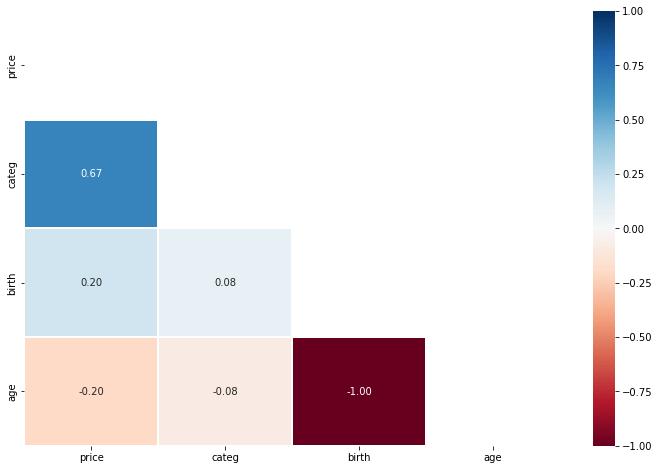

In [20]:
comatrix(df)
# Matrice de corrélation de Pearson

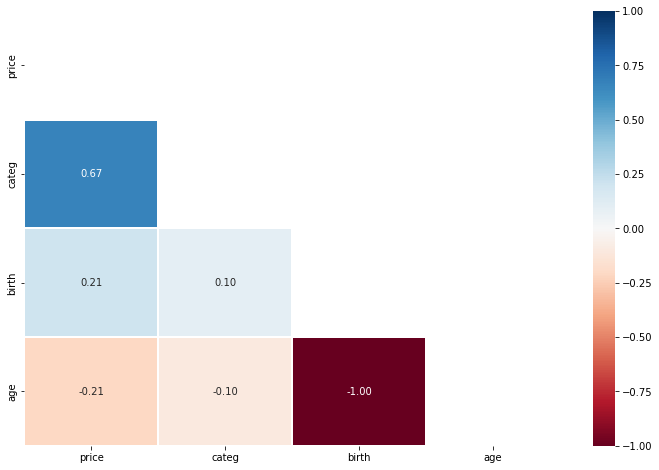

In [21]:
comatrix(dfall)
# Matrice de corrélation de Pearson

## __Test de Corrélation ; Sexe & Catégorie__

> Avec pour hypothèse H0 ➡️ les 2 variable sont indépendantes, donc pas corrélé.
<br> Seuil de risque fixé à 5% d'erreur

In [22]:
# Création table pivot (tableau croisé)
corr_sex_categ = df[["sex","categ"]].pivot_table(index="sex",columns="categ", aggfunc=len, margins=True, margins_name="Total")

In [23]:
# Test de Khi2 car les deux variable sont des qualitative
from scipy import stats #as chi2_contingency
khi2, p_value, dof, exp = stats.chi2_contingency(corr_sex_categ)

In [24]:
print("khi2 =",khi2,"\np_value =", p_value)

khi2 = 20.200173796862927 
p_value = 0.002551063708568263


In [25]:
dof

6

In [26]:
expectation = pd.DataFrame(exp, index=["f","m","Total"], columns=["0.0","1.0","2.0","Total"])
np_corr_sex_categ = corr_sex_categ.to_numpy()
np_corr_sex_categ

array([[200904, 111331,  16980, 329215],
       [186589, 101017,  15868, 303474],
       [387493, 212348,  32848, 632689]])

In [27]:
corr_sex_categ

categ,0.0,1.0,2.0,Total
sex,,,,
f,200904,111331,16980,329215
m,186589,101017,15868,303474
Total,387493,212348,32848,632689


In [28]:
x2 = ((np_corr_sex_categ-exp)**2)/exp

In [29]:
x2 = pd.DataFrame(x2, index=["f","m","Total_y"], columns=("0","1","2","Total_x"))
#x2 = x2.drop("Total_y")
#x2 = x2.drop("Total_x", axis=1)
x2 

,0,1,2,Total_x
f,2.607546,6.344940,0.736678,0.0
m,2.828720,6.883125,0.799164,0.0
Total_y,0.000000,0.000000,0.000000,0.0


In [30]:
mesure = x2.sum().sum()

In [31]:
reslt = exp/x2.to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [32]:
reslt = x2/mesure
reslt = reslt.drop("Total_y")
reslt = reslt.drop("Total_x", axis=1)

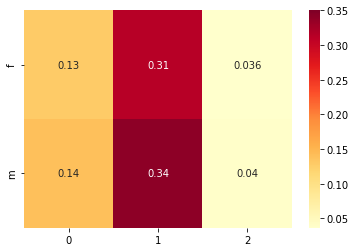

In [33]:
sns.heatmap(reslt, cmap=("YlOrRd"), annot=reslt, vmax=0.35)

## __Test de corrélation ; Age & C.A.__
> H0 ➡️ Refus de corrélation
<br> Seuil de risque fixé à 5% d'erreur


In [34]:
corr_age_ca = df[["age","price"]]
corr_age_ca = corr_age_ca.groupby("age").agg({"price":"sum"}).reset_index()
np_corr_age_ca = corr_age_ca.to_numpy()
corr_age_ca

,age,price
0,19,609013.690000
1,20,178195.780000
2,21,184209.264564
3,22,178497.700000
4,23,165029.256376
...,...,...
71,90,5264.988188
72,91,5043.190000
73,92,2815.450000
74,93,4013.870000


<function matplotlib.pyplot.show>

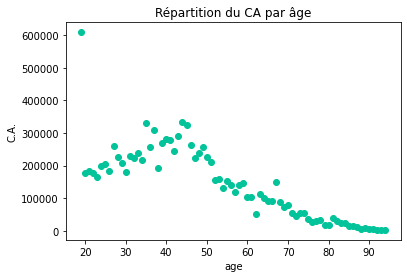

In [35]:
plt.plot(corr_age_ca.age,corr_age_ca.price,"o", color="#02c39a")
plt.xlabel("age")
plt.ylabel("C.A.")
plt.title("Répartition du CA par âge")
plt.show

74877.0648487242


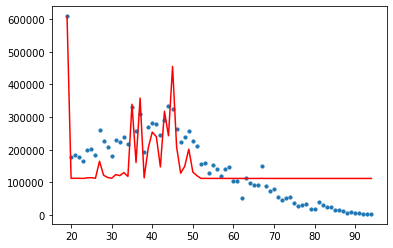

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

x = corr_age_ca.age
y = corr_age_ca.price

poly = PolynomialFeatures(degree=16)
x_poly = poly.fit_transform(corr_age_ca)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
#r2 = r2_score(y,y_poly_pred)
print(rmse)
#print(r2)
import operator
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x_p, y_poly_pred_P = zip(*sorted_zip)
plt.plot(x_p, y_poly_pred_P, color='r')
plt.show()

In [37]:
coefcorr_age_ca , p_value = stats.spearmanr(corr_age_ca.age,corr_age_ca.price)

In [38]:
p_value

7.352708223159905e-25

In [39]:
coefcorr_age_ca

-0.8736842105263158

## __Test de corrélation ; Age & fréquence d'achat__

In [40]:
corr_age_freq = df[["class_age","session_id","client_id"]]
freq = corr_age_freq.groupby("class_age").resample("M").agg({"session_id":"count", "client_id":pd.Series.nunique})
freq["freq"] = freq.session_id/freq.client_id 
#freq = freq.groupby("class_age").agg({"freq":"mean"})
freq = freq.drop(["session_id","client_id"],axis=1)
freq = freq.reset_index()
freq = freq.drop("date", axis=1)
freq

,class_age,freq
0,19-24,2.657194
1,19-24,2.621291
2,19-24,2.564489
3,19-24,2.792619
4,19-24,2.753467
...,...,...
355,90-94,3.071429
356,90-94,3.800000
357,90-94,3.823529
358,90-94,3.823529


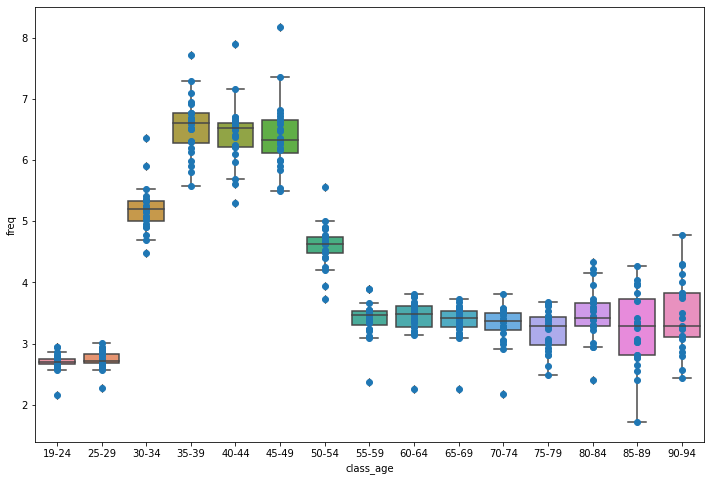

In [41]:
plt.figure(figsize=[12,8])
sns.boxplot(data=freq, x=freq.class_age, y=freq.freq)
plt.plot(freq.class_age,freq.freq, "o")

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('freq ~ class_age', data = freq).fit()
# aov = sm.stats.anova_lm(mod, type=2)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     271.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.70e-176
Time:                        16:01:00   Log-Likelihood:                -182.15
No. Observations:                 360   AIC:                             394.3
Df Residuals:                     345   BIC:                             452.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.6982      0